## Airbnb Listings Analysis
    
## Objective 1
        Read the CSV File
        Cast any date column as datetime format
        Filter down the data to just show listings in Paris
        QA the Paris listingb data: check for missing values calculate min, max and avg for each numeric field

In [7]:
import pandas as pd

listings = pd.read_csv("Listings.csv", encoding="iso-8859-1", low_memory=False)

In [9]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [41]:
## Casting the host_since column as datetime format

listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [37]:
## Filtering the listings only for Paris and only taking the required colums for analysis

paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since","neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [35]:
## Finding missing values by column

paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [43]:
## Some Statsitics

paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [45]:
## finding the number of times the accommodates value is 0

paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## Objective 2 Data for Visulization
## Create table named paris_listings_neighbourhood and calculate the mean price of each neighbourhood stored from lowest to highest
## Create table named paris_listings_accommodations. This should filter down most expensive neighbourhood in paris grouped by accommodations column and contain mean price for each value of accommodates sorted from lowest to highest
## Create table named paris_listing_overtime, which is grouped by the host_since column by year. Calculate the count of rows representing the new hosts and the average price for each year

In [55]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [57]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood =='Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [63]:
paris_listings_overtime = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood" : "count",
        "price" : "mean"
    })
)

paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Objective 3 Visuliaze the Data

##create horizontal bar chart indicating the average price by neighbourhood. Please make sure to add title and change axis lables

##create horizontal bar chart indicating the average price by accommodates. Please make sure to add title and change axis lables

##create 2 line charts one counts new hosts over time and one for avg price. Make sure to set y axis limit to 0 and add title and change axis lable as needed

##based on your findings what are your insights about the imnpact of 2015 regulation on new hosts and prices?

##create dual axis chat that contain new hosts over time and avg price over time

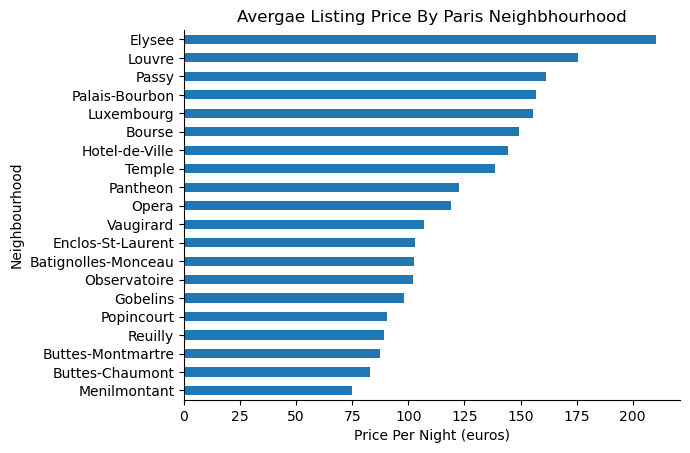

In [90]:
import seaborn as sns

(paris_listings_neighbourhood
    .plot
    .barh(
         title="Avergae Listing Price By Paris Neighbhourhood",
         xlabel="Price Per Night (euros)",
         ylabel="Neighbourhood",
         legend=None
     )
)

sns.despine()

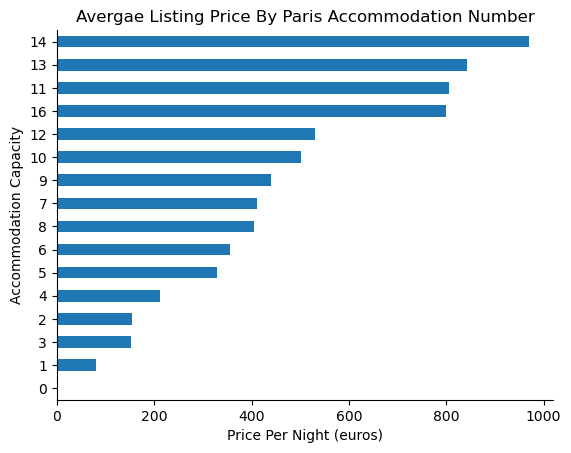

In [94]:
import seaborn as sns

(paris_listings_accommodates
    .plot
    .barh(
         title="Avergae Listing Price By Paris Accommodation Number",
         xlabel="Price Per Night (euros)",
         ylabel="Accommodation Capacity",
         legend=None
     )
)

sns.despine()

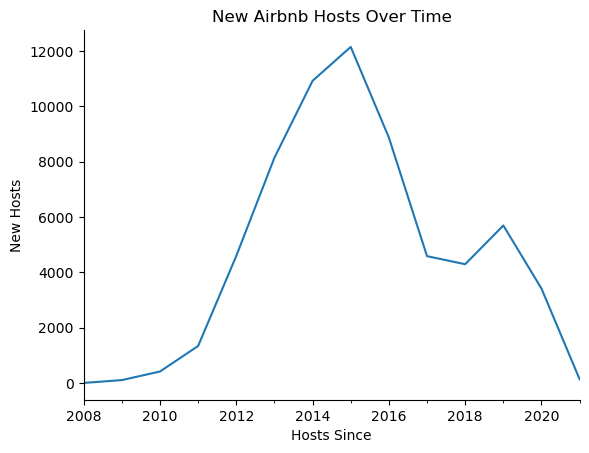

In [98]:
paris_listings_overtime["neighbourhood"].plot(
    title="New Airbnb Hosts Over Time",
    ylabel="New Hosts",
    xlabel="Hosts Since"
)

sns.despine()

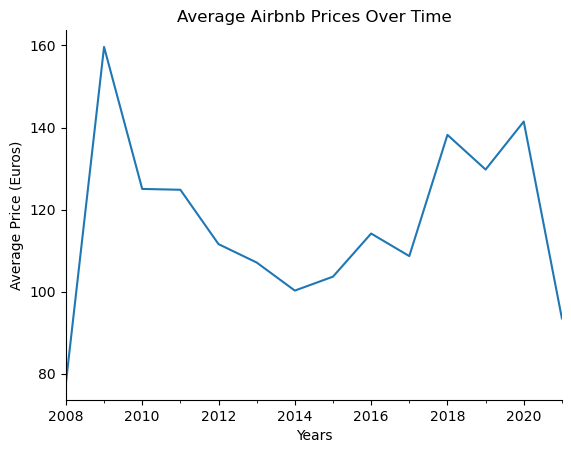

In [102]:
paris_listings_overtime["price"].plot(
    title="Average Airbnb Prices Over Time",
    ylabel="Average Price (Euros)",
    xlabel="Years"
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations led to fewer New Hosts, Higher Prices')

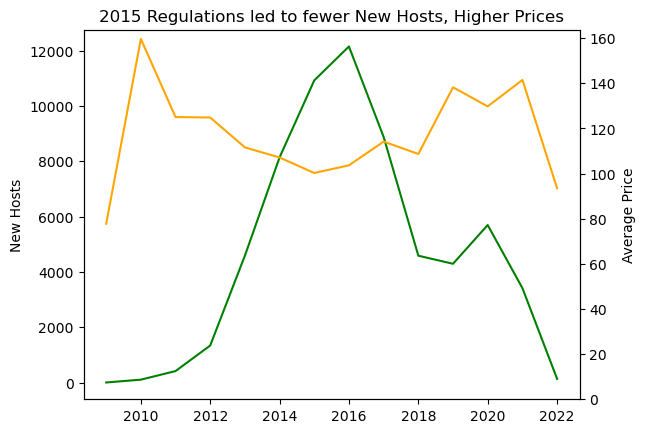

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["neighbourhood"],
    label="New Hosts",
    c="green"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["price"],
    label="Average Price",
    c="orange"
)

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations led to fewer New Hosts, Higher Prices")